In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dropout, Flatten
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pickle
import os
import shutil
warnings.filterwarnings("ignore") 

In [40]:
df = pd.read_csv('output_file.csv' )
# df = df.drop(['Unnamed: 7'],axis=1)

In [41]:
df.head()

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
0,2021-11-01 00:00,2.100013,207.79967,21544.232,288.35187,278.53552,88.662880
1,2021-11-01 00:20,1.494543,195.41899,22789.700,289.25757,278.40363,85.743430
2,2021-11-01 00:40,1.203924,205.38362,26924.135,293.32623,278.90930,66.800240
3,2021-11-01 01:00,0.787564,204.74925,28133.807,297.54370,279.38147,53.934402
4,2021-11-01 01:20,1.840468,187.68733,29133.484,300.45508,278.62110,36.173420


In [42]:
print(df.dtypes)

time            object
Wind_speed     float64
Wind_dir       float64
Visibility     float64
Temperature    float64
dewpoint       float64
Humidity       float64
dtype: object


In [43]:
df.isnull().sum()

time           0
Wind_speed     0
Wind_dir       0
Visibility     0
Temperature    0
dewpoint       0
Humidity       0
dtype: int64

In [44]:
for ind in df.index:
    #kelvin to celcius conversion 
    df['Temperature'][ind] = abs(df['Temperature'][ind]- 273.15)
    df['dewpoint'][ind] = abs(df['dewpoint'][ind]- 273.15)
    # df['Temperature'][ind] =abs(df['Temperature'][ind])- 273.15
    # df['dewpoint'][ind] = abs(df['dewpoint'][ind])- 273.15
    # #knotts to meter conversion 
    # df['Dew_point'][ind] = df['Dew_point'][ind]*0.514444
    
df.head(10)

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
0,2021-11-01 00:00,2.100013,207.79967,21544.232,15.20187,5.38552,88.662880
1,2021-11-01 00:20,1.494543,195.41899,22789.700,16.10757,5.25363,85.743430
2,2021-11-01 00:40,1.203924,205.38362,26924.135,20.17623,5.75930,66.800240
3,2021-11-01 01:00,0.787564,204.74925,28133.807,24.39370,6.23147,53.934402
4,2021-11-01 01:20,1.840468,187.68733,29133.484,27.30508,5.47110,36.173420
5,2021-11-01 01:40,1.676271,190.71544,29520.550,28.67150,3.95498,26.558815
6,2021-11-01 02:00,0.950372,173.11082,29653.229,29.38424,1.69180,22.900663
7,2021-11-01 02:20,1.115465,180.68660,29716.352,29.85630,0.31008,20.953957
8,2021-11-01 02:40,1.463725,191.78021,29714.598,29.88864,1.08463,21.123707
9,2021-11-01 03:00,2.096984,199.15121,29545.014,29.08850,1.10438,25.894405


In [45]:
df['time']=pd.to_datetime(df['time']  ,format='%Y-%m-%d %H:%M')
df.set_index( 'time',drop=False, append=False, inplace=True, verify_integrity=False )
# df.index.name = None
# df = df.drop(['time'],axis=1)
df.to_csv("api-training.csv")   
df.head()

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
time,,,,,,,
2021-11-01 00:00:00,2021-11-01 00:00:00,2.100013,207.79967,21544.232,15.20187,5.38552,88.662880
2021-11-01 00:20:00,2021-11-01 00:20:00,1.494543,195.41899,22789.700,16.10757,5.25363,85.743430
2021-11-01 00:40:00,2021-11-01 00:40:00,1.203924,205.38362,26924.135,20.17623,5.75930,66.800240
2021-11-01 01:00:00,2021-11-01 01:00:00,0.787564,204.74925,28133.807,24.39370,6.23147,53.934402
2021-11-01 01:20:00,2021-11-01 01:20:00,1.840468,187.68733,29133.484,27.30508,5.47110,36.173420


In [11]:
#from datetime import datetime
df['date']=df['time'].dt.day
df['month']=df['time'].dt.month
df['hour']=df['time'].dt.hour
df['min']=df['time'].dt.minute
df.head()

KeyError: 'time'

<AxesSubplot:xlabel='time'>

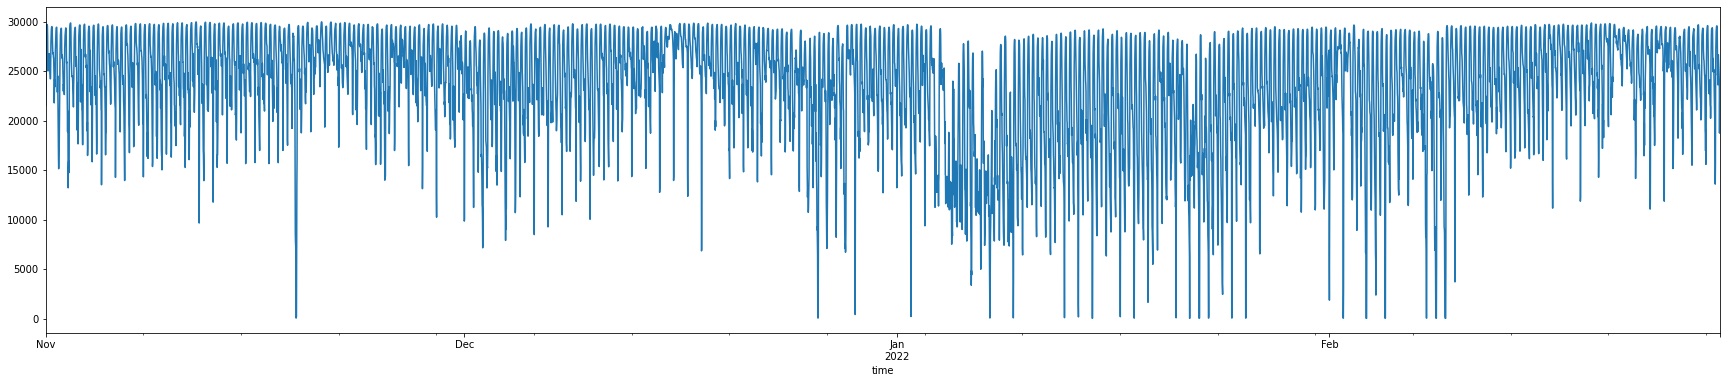

In [10]:
from matplotlib.pyplot import figure
figure(figsize=(30, 6))
ddd=df
ddd.groupby('time')['Visibility'].median().plot()

In [11]:
df1 = df
col=['time','Visibility']
new_df= df1.drop(columns=col)
df_for_training = new_df.astype(float)
df_for_training.head(10)


,Wind_speed,Wind_dir,Temperature,dewpoint,Humidity,date,month,hour,min
0,2.100013,207.79967,15.20187,278.53552,88.662880,1.0,11.0,0.0,0.0
1,1.494543,195.41899,16.10757,278.40363,85.743430,1.0,11.0,0.0,20.0
2,1.203924,205.38362,20.17623,278.90930,66.800240,1.0,11.0,0.0,40.0
3,0.787564,204.74925,24.39370,279.38147,53.934402,1.0,11.0,1.0,0.0
4,1.840468,187.68733,27.30508,278.62110,36.173420,1.0,11.0,1.0,20.0
5,1.676271,190.71544,28.67150,277.10498,26.558815,1.0,11.0,1.0,40.0
6,0.950372,173.11082,29.38424,274.84180,22.900663,1.0,11.0,2.0,0.0
7,1.115465,180.68660,29.85630,273.46008,20.953957,1.0,11.0,2.0,20.0
8,1.463725,191.78021,29.88864,272.06537,21.123707,1.0,11.0,2.0,40.0
9,2.096984,199.15121,29.08850,272.04562,25.894405,1.0,11.0,3.0,0.0


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [13]:
df_for_training_scaled

array([[0.23794049, 0.57698817, 0.4351896 , ..., 0.90909091, 0.        ,
        0.        ],
       [0.16799774, 0.54257677, 0.46777876, ..., 0.90909091, 0.        ,
        0.5       ],
       [0.13442599, 0.5702729 , 0.61417846, ..., 0.90909091, 0.        ,
        1.        ],
       ...,
       [0.32003586, 0.20261984, 0.39798931, ..., 0.09090909, 0.95652174,
        1.        ],
       [0.08872759, 0.41389492, 0.37605523, ..., 0.09090909, 1.        ,
        0.        ],
       [0.22571163, 0.83837738, 0.37839192, ..., 0.09090909, 1.        ,
        0.5       ]])

In [14]:
X=np.array(df_for_training)
print(X)
df_for_training

[[  2.100013  207.79967    15.20187   ...  11.          0.
    0.       ]
 [  1.4945427 195.41899    16.10757   ...  11.          0.
   20.       ]
 [  1.2039236 205.38362    20.17623   ...  11.          0.
   40.       ]
 ...
 [  2.8106844  73.10785    14.16802   ...   2.         22.
   40.       ]
 [  0.8083283 149.12129    13.55844   ...   2.         23.
    0.       ]
 [  1.994152  301.84338    13.62338   ...   2.         23.
   20.       ]]


,Wind_speed,Wind_dir,Temperature,dewpoint,Humidity,date,month,hour,min
0,2.100013,207.799670,15.20187,278.53552,88.662880,1.0,11.0,0.0,0.0
1,1.494543,195.418990,16.10757,278.40363,85.743430,1.0,11.0,0.0,20.0
2,1.203924,205.383620,20.17623,278.90930,66.800240,1.0,11.0,0.0,40.0
3,0.787564,204.749250,24.39370,279.38147,53.934402,1.0,11.0,1.0,0.0
4,1.840468,187.687330,27.30508,278.62110,36.173420,1.0,11.0,1.0,20.0
...,...,...,...,...,...,...,...,...,...
8634,2.878578,43.280148,15.15707,281.29224,78.582830,28.0,2.0,22.0,0.0
8635,2.929234,57.654358,14.70560,280.32050,80.957250,28.0,2.0,22.0,20.0
8636,2.810684,73.107850,14.16802,279.57960,82.649110,28.0,2.0,22.0,40.0
8637,0.808328,149.121290,13.55844,278.29030,92.568290,28.0,2.0,23.0,0.0


In [15]:
# trainX = []
# trainY = []
# trainY = df_for_training["Visibility"].to_numpy().reshape(-1,1)
# trainX = df_for_training.to_numpy().reshape(-1, 8639,9)
trainX = []
trainY = []
n_future = 1 
n_past = 35
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [16]:
trainX, trainY = np.array(trainX), np.array(trainY)
print(trainX.shape)
print(trainY.shape)

(8604, 35, 9)
(8604, 1)


In [17]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=2000)
#p = PrintArray(precision=4, linewidth=150, suppress=True)
trainX

array([[[0.238, 0.577, 0.435, ..., 0.909, 0.   , 0.   ],
        [0.168, 0.543, 0.468, ..., 0.909, 0.   , 0.5  ],
        [0.134, 0.57 , 0.614, ..., 0.909, 0.   , 1.   ],
        ...,
        [0.166, 0.483, 0.942, ..., 0.909, 0.435, 1.   ],
        [0.144, 0.511, 0.934, ..., 0.909, 0.478, 0.   ],
        [0.236, 0.433, 0.871, ..., 0.909, 0.478, 0.5  ]],

       [[0.168, 0.543, 0.468, ..., 0.909, 0.   , 0.5  ],
        [0.134, 0.57 , 0.614, ..., 0.909, 0.   , 1.   ],
        [0.086, 0.569, 0.766, ..., 0.909, 0.043, 0.   ],
        ...,
        [0.144, 0.511, 0.934, ..., 0.909, 0.478, 0.   ],
        [0.236, 0.433, 0.871, ..., 0.909, 0.478, 0.5  ],
        [0.324, 0.356, 0.751, ..., 0.909, 0.478, 1.   ]],

       [[0.134, 0.57 , 0.614, ..., 0.909, 0.   , 1.   ],
        [0.086, 0.569, 0.766, ..., 0.909, 0.043, 0.   ],
        [0.208, 0.521, 0.871, ..., 0.909, 0.043, 0.5  ],
        ...,
        [0.236, 0.433, 0.871, ..., 0.909, 0.478, 0.5  ],
        [0.324, 0.356, 0.751, ..., 0.909, 0.4

In [18]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(24, activation='relu', return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 35, 256)           272384    
                                                                 
 lstm_1 (LSTM)               (None, 35, 64)            82176     
                                                                 
 lstm_2 (LSTM)               (None, 35, 128)           98816     
                                                                 
 lstm_3 (LSTM)               (None, 24)                14688     
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 468,089
Trainable params: 468,089
Non-trai

In [19]:
history = model.fit(trainX, trainY, epochs=50, batch_size=70,verbose=1)

plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Epoch 1/50
123/123 [==============================] - 34s 238ms/step - loss: 0.0196
Epoch 2/50
123/123 [==============================] - 30s 242ms/step - loss: 0.0148
Epoch 3/50
123/123 [==============================] - 31s 251ms/step - loss: 0.0139
Epoch 4/50
123/123 [==============================] - 30s 243ms/step - loss: 0.0123
Epoch 5/50
123/123 [==============================] - 31s 254ms/step - loss: 0.0095
Epoch 6/50
123/123 [==============================] - 31s 250ms/step - loss: 0.0067
Epoch 7/50
123/123 [==============================] - 39s 321ms/step - loss: 0.0051
Epoch 8/50
123/123 [==============================] - 35s 286ms/step - loss: 0.0043
Epoch 9/50
123/123 [==============================] - 31s 248ms/step - loss: 0.0039
Epoch 10/50
123/123 [==============================] - 29s 238ms/step - loss: 0.0039
Epoch 11/50
123/123 [==============================] - 30s 247ms/step - loss: 0.0036
Epoch 12/50
123/123 [==============================] - 30s 241ms/step - lo

KeyboardInterrupt: 

In [12]:
df_test=pd.read_csv('train.txt',   delim_whitespace=True,encoding="latin-1" )
df_test.columns =['time', 'Wind_speed', 'Wind_dir', 'Visibility' ,'Temperature' ,'dewpoint']
df_test.head()
df_test.isnull().sum()


time             0
Wind_speed     269
Wind_dir       269
Visibility     270
Temperature    270
dewpoint       270
dtype: int64

In [13]:
df_test['Wind_speed'].fillna(df_test['Wind_speed'].median(), inplace = True)
# df_test['Wind_dir'].fillna(df_test['Wind_dir'].median(), inplace = True)
df_test['Wind_dir'].fillna(method ='pad' ,inplace = True)
df_test['Visibility'].fillna(df_test['Visibility'].median(), inplace = True)
df_test['Temperature'].fillna(df_test['Temperature'].median(), inplace = True)
df_test['dewpoint'].fillna(df_test['dewpoint'].median(), inplace = True)

df_test.head(10)

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint
0,20201101_0100Z,0.0,000,1000.0,15.0,10.0
1,20201101_0200Z,0.0,000,800.0,14.0,10.0
2,20201101_0300Z,0.0,000,1200.0,17.0,10.0
3,20201101_0400Z,4.0,250,1300.0,20.0,10.0
4,20201101_0500Z,5.0,260,1300.0,23.0,9.0
5,20201101_0600Z,6.0,280,1800.0,25.0,8.0
6,20201101_0700Z,3.0,280,1500.0,16.0,10.0
7,20201101_0800Z,10.0,290,3500.0,30.0,9.0
8,20201101_0900Z,8.0,290,3500.0,30.0,6.0
9,20201101_1000Z,8.0,300,3500.0,30.0,6.0


In [14]:
#computing humidity values
relhum = []
import math
for ind in df_test.index:
    relhum.append(100*(math.exp((17.625*df_test['dewpoint'][ind])/(243.04+df_test['dewpoint'][ind]))/math.exp((17.625*df_test['Temperature'][ind])/(243.04+df_test['Temperature'][ind]))))
df_test['Humidity'] = relhum    

In [15]:
# pd.to_datetime('20201101 0100')

In [16]:
#data cleaning and conversion 
for ind in df_test.index:
    #kelvin to celcius conversion 
    # df_test['Temperature'][ind] = abs(df_test['Temperature'][ind]- 273.15)
    # df_test['dewpoint'][ind] = abs(df_test['dewpoint'][ind]- 273.15)
    # #knotts to meter conversion 
    df_test['Wind_speed'][ind] = df_test['Wind_speed'][ind]*0.514444
    df_test['time'][ind] = str(df_test['time'][ind]).replace('_', ' ')[:-1]
    if df_test['Wind_dir'][ind] == 'VRB':
        df_test['Wind_dir'][ind]= 000

# Datetime = []
# Datetime = df_test["time"]
# df_test.set_index( 'time',drop=False, append=False, inplace=True, verify_integrity=False )
df_test.set_index( 'time',drop=False, append=False, inplace=True, verify_integrity=False )
# df_test.index.name = None
df_test = df_test.drop(['time'],axis=1)  
df_test.to_csv("api-testing.csv" )
df_test.head()


,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
time,,,,,,
20201101 0100,0.000000,000,1000.0,15.0,10.0,72.034842
20201101 0200,0.000000,000,800.0,14.0,10.0,76.840593
20201101 0300,0.000000,000,1200.0,17.0,10.0,63.400630
20201101 0400,2.057776,250,1300.0,20.0,10.0,52.541326
20201101 0500,2.572220,260,1300.0,23.0,9.0,40.886402


In [14]:
df_test['time']=pd.to_datetime(df_test['time'])
df_test['month']=df_test['time'].dt.minute
df_test['date']=df_test['time'].dt.day
df_test['month']=df_test['time'].dt.month
df_test['hour']=df_test['time'].dt.hour
    
df_test.head(10)

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity,month,date,hour
0,2020-11-01 01:00:00,0.000000,000,1000.0,15.0,10.0,72.034842,11,1,1
1,2020-11-01 02:00:00,0.000000,000,800.0,14.0,10.0,76.840593,11,1,2
2,2020-11-01 03:00:00,0.000000,000,1200.0,17.0,10.0,63.400630,11,1,3
3,2020-11-01 04:00:00,2.057776,250,1300.0,20.0,10.0,52.541326,11,1,4
4,2020-11-01 05:00:00,2.572220,260,1300.0,23.0,9.0,40.886402,11,1,5
5,2020-11-01 06:00:00,3.086664,280,1800.0,25.0,8.0,33.884439,11,1,6
6,2020-11-01 07:00:00,1.543332,280,1500.0,16.0,10.0,67.563333,11,1,7
7,2020-11-01 08:00:00,5.144440,290,3500.0,30.0,9.0,27.058607,11,1,8
8,2020-11-01 09:00:00,4.115552,290,3500.0,30.0,6.0,22.049090,11,1,9
9,2020-11-01 10:00:00,4.115552,300,3500.0,30.0,6.0,22.049090,11,1,10


In [ ]:
df_for_pred=df_test.drop(columns="time")
df_for_pred.astype(float)
df_pred_scaled=scaler.transform(df_for_pred)

In [ ]:
X_pred = []
for i in range(n_past, len(df_pred_scaled) - n_future +1):
    X_pred.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
X_pred= np.array(X_pred)

print('X for prediction shape == {}.'.format(X_pred.shape))

In [ ]:
# prediction = model.predict(X_pred) 
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)

y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
# y_pred_future

# y_pred_future = scaler.inverse_transform(prediction_copies)
print(y_pred_future)

df_forecast=[]
df_forecast = pd.DataFrame(y_pred_future)
# temp_df=[]
# temp_df=pd.DataFrame(np.zeros(n_past))
df_forecast =pd.concat([temp_df,df_forecast], ignore_index=True)
df_forecast
df_forecast.to_csv("op.csv")   
print(df_forecast)


In [ ]:
df_actual= pd.read_csv('op.csv')
df_actual['0']=df_forecast
df_actual = df_actual.iloc[n_past:]
df_actual
a4_dims = (25,8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(df_actual['0'], df_actual['0'])
print(df_actual['0'], df_actual['0'])
sns.lineplot(df_actual['0'], df_actual[''])

In [ ]:
df_forecast